In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV_PATH = "cefr.csv"
TEXT_COL = "text"
LABEL_COL = "cefr_level"

df = pd.read_csv(CSV_PATH)
df

,title,lang,source_name,format,category,cefr_level,license,text
0,na,en,cefr-sp,sentence-level,reference,A1,CC BY-NC-SA 4.0,Is that your bike ?
1,na,en,cefr-sp,sentence-level,reference,A1,CC BY-NC-SA 4.0,She had a beautiful necklace around her neck .
2,na,en,cefr-sp,sentence-level,reference,A1,CC BY-NC-SA 4.0,I forgot to bring my umbrella .
3,na,en,cefr-sp,sentence-level,reference,A1,CC BY-NC-SA 4.0,The baby kept crying .
4,na,en,cefr-sp,sentence-level,reference,A1,CC BY-NC-SA 4.0,Do you know what you 're doing this weekend ?
...,...,...,...,...,...,...,...,...
9999,na,en,cefr-sp,sentence-level,reference,C2,CC BY-NC-SA 4.0,Barium bromide can be made by reacting barium ...
10000,na,en,cefr-sp,sentence-level,reference,C2,CC BY-NC-SA 4.0,RNA viruses generally have very high mutation ...
10001,na,en,cefr-sp,sentence-level,reference,C2,CC BY-NC-SA 4.0,Chlorophyll molecules are arranged in and arou...
10002,na,en,cefr-sp,sentence-level,reference,C2,CC BY-NC-SA 4.0,Although most of a cell 's DNA is contained in...


In [2]:
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
print("\nNull counts:")
print(df.isnull().sum())

text_series = df[TEXT_COL].astype(str)
level_series = df[LABEL_COL].astype(str)

char_lengths = text_series.str.len()
print("\nTEXT LENGTH (CHAR) STATS")
print(char_lengths.describe())

cefr_counts = level_series.value_counts().sort_index()
print("\nCEFR LEVEL COUNTS")
print(cefr_counts)

print("\nSAMPLE ROWS")
print(df.sample(5, random_state=42))

Rows: 10004
Columns: ['title', 'lang', 'source_name', 'format', 'category', 'cefr_level', 'license', 'text']

Null counts:
title          0
lang           0
source_name    0
format         0
category       0
cefr_level     0
license        0
text           0
dtype: int64

TEXT LENGTH (CHAR) STATS
count    10004.000000
mean        79.187825
std         36.159350
min         14.000000
25%         50.000000
50%         74.000000
75%        103.000000
max        221.000000
Name: text, dtype: float64

CEFR LEVEL COUNTS
cefr_level
A1     124
A2    1271
B1    3305
B2    3330
C1    1744
C2     230
Name: count, dtype: int64

SAMPLE ROWS
     title lang source_name          format   category cefr_level  \
2818    na   en     cefr-sp  sentence-level  reference         A2   
4382    na   en     cefr-sp  sentence-level  reference         B1   
7713    na   en     cefr-sp  sentence-level  reference         C1   
8166    na   en     cefr-sp  sentence-level  reference         C1   
4598    na   en    

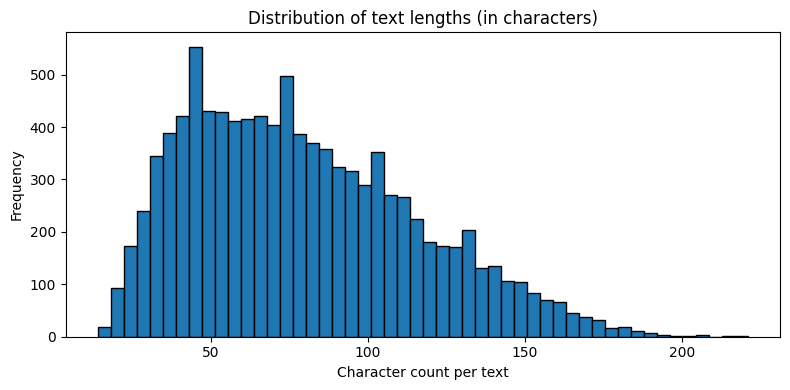

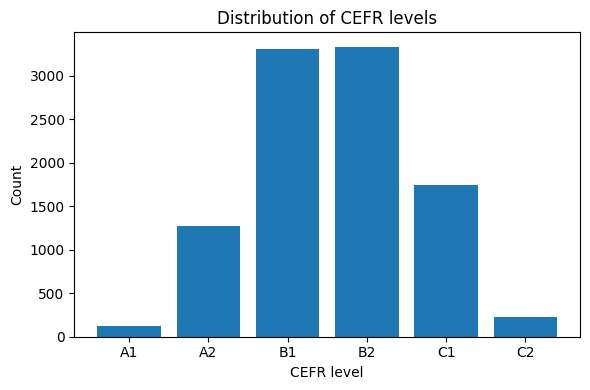

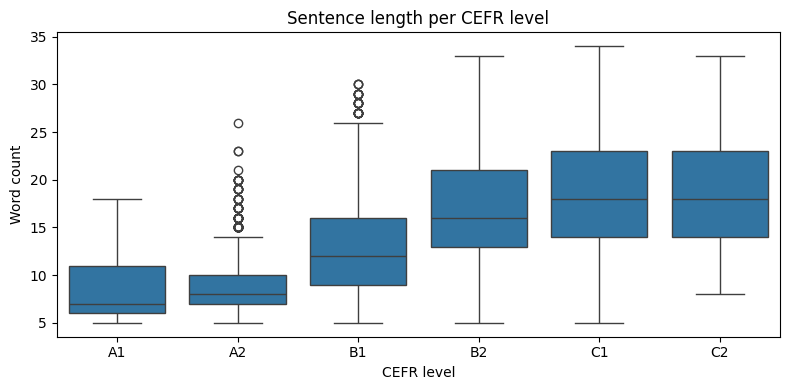

In [3]:
plt.figure(figsize=(8, 4))
plt.hist(char_lengths, bins=50, edgecolor='black')
plt.xlabel("Character count per text")
plt.ylabel("Frequency")
plt.title("Distribution of text lengths (in characters)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(cefr_counts.index, cefr_counts.values)
plt.xlabel("CEFR level")
plt.ylabel("Count")
plt.title("Distribution of CEFR levels")
plt.tight_layout()
plt.show()

df["word_len"] = df["text"].astype(str).str.split().apply(len)
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="cefr_level", y="word_len")
plt.xlabel("CEFR level")
plt.ylabel("Word count")
plt.title("Sentence length per CEFR level")
plt.tight_layout()
plt.show()
